# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [4]:
Direct_Bilirubin = np.array(data["Direct_Bilirubin"]).reshape(-1,1)
Total_Bilirubin = np.array(data["Total_Bilirubin"]).reshape(-1,1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.model_selection import train_test_split

# x = freedom,
# y = positive
X_train, X_test, y_train, y_test = train_test_split(
    Direct_Bilirubin,
    Total_Bilirubin,
    test_size = 0.2
)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

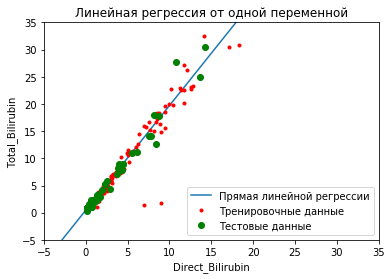

In [8]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-5,35)
plt.ylim(-5,35)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [11]:
age = np.array(data["Age"])
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [12]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [13]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех колонок. 

In [14]:
data.Total_Bilirubin.quantile([0.25,0.5,0.75])

0.25    0.8
0.50    1.0
0.75    2.6
Name: Total_Bilirubin, dtype: float64

In [38]:
for col in data.columns.values.tolist():
    print(col)
    if col not in ["Gender"]:
        print(data[col].quantile([0.25,0.5,0.75]))
        print("\n")


Age
0.25    33.0
0.50    45.0
0.75    58.0
Name: Age, dtype: float64


Gender
Total_Bilirubin
0.25    0.8
0.50    1.0
0.75    2.6
Name: Total_Bilirubin, dtype: float64


Direct_Bilirubin
0.25    0.2
0.50    0.3
0.75    1.3
Name: Direct_Bilirubin, dtype: float64


Alkaline_Phosphotase
0.25    175.5
0.50    208.0
0.75    298.0
Name: Alkaline_Phosphotase, dtype: float64


Alamine_Aminotransferase
0.25    23.0
0.50    35.0
0.75    60.5
Name: Alamine_Aminotransferase, dtype: float64


Aspartate_Aminotransferase
0.25    25.0
0.50    42.0
0.75    87.0
Name: Aspartate_Aminotransferase, dtype: float64


Total_Protiens
0.25    5.8
0.50    6.6
0.75    7.2
Name: Total_Protiens, dtype: float64


Albumin
0.25    2.6
0.50    3.1
0.75    3.8
Name: Albumin, dtype: float64


Albumin_and_Globulin_Ratio
0.25    0.70
0.50    0.93
0.75    1.10
Name: Albumin_and_Globulin_Ratio, dtype: float64


Dataset
0.25    1.0
0.50    1.0
0.75    2.0
Name: Dataset, dtype: float64




Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

(array([241.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

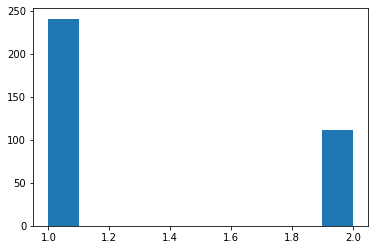

In [42]:
plt.hist(data[data["Age"] < 50]["Dataset"])

In [56]:
import statistics
print(statistics.mean(data[data["Age"] < 50]["Dataset"]))
data[data["Age"] < 50].quantile([0.5])

1.3172804532577904


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.5,35.0,0.9,0.3,205.0,36.0,42.0,6.7,3.2,1.0,1.0


(array([175.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  55.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

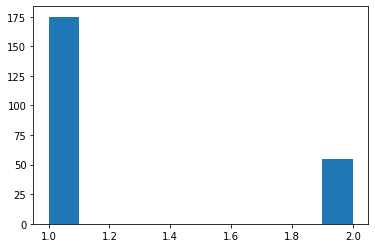

In [43]:
plt.hist(data[data["Age"] >= 50]["Dataset"])

In [59]:
print(statistics.mean(data[data["Age"] >= 50]["Dataset"]))
data[data["Age"] > 50].quantile([0.5])

1.2391304347826086


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.5,60.0,1.1,0.4,215.0,34.0,41.0,6.3,3.0,0.8,1.0


После 50-ти меньше здоровых, 50 процентов людей до 50 моложе 35. 50% людей после 50 моложе 60.


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [65]:
ill = data[data["Dataset"] == 1]["Total_Bilirubin"]
stats.ttest_1samp(ill, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

Так как t критерий имеет величину, близкую к критическому значению - средние значения выборок существенно отличаются, поэтому данную выборка не похожа на генеральную совокупность

In [66]:
print('Количество больных всего: ', len(ill))

Количество больных всего:  416


Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [67]:
ill = data[data["Dataset"] == 1]["Total_Bilirubin"]
healthy = data[data["Dataset"] == 2]["Total_Bilirubin"]
print(stats.ttest_ind(ill, healthy))

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)


данные группы не схожи, так как их средние значения сильно отличаются

In [68]:
len(data)

583

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [75]:
group_1 = data[data["Age"] <= 30]["Dataset"]
group_2 = data[(data["Age"] > 30) & (data["Age"] <= 55)]["Dataset"]
group_3 = data[data["Age"] > 55]["Dataset"]
stats.f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

статистическая значимость - pvalue. Чем она ниже, тем меньше вероятность, что на результат повлияла случайность. Так как pvalue мало, то выборки отличаются не случайно и они действительно отличаются

Вопросы задавать на почту yustiks@gmail.com